In [1]:
# pytorch-common-import!
import torch
from torch.autograd import Variable 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

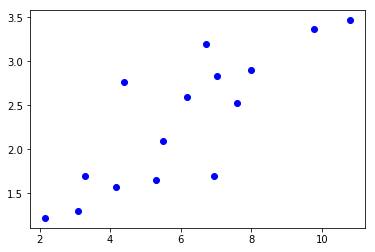

In [4]:
plt.plot(x_train, y_train, 'bo')

In [5]:
x = torch.from_numpy(x_train)

In [6]:
y = torch.from_numpy(y_train)

In [7]:
x = Variable(x)
y = Variable(y)

In [8]:
w = Variable(torch.randn(1), requires_grad = True)

In [9]:
b = Variable(torch.zeros(1), requires_grad = True)

In [10]:
def linear_model(x):
    return w*x + b

In [11]:
y_ = linear_model(x)

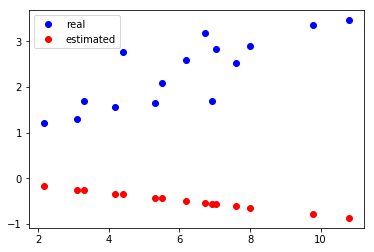

In [12]:
plt.plot(x_train, y_train, 'bo', label = "real")
plt.plot(x_train, y_.data.numpy(), 'ro', label = 'estimated')
plt.legend()

In [13]:
def get_loss(y_ , y):
    return torch.mean((y_ - y ) ** 2)

In [14]:
loss = get_loss(y_ , y)

In [15]:
loss.backward()

In [16]:
w.data = w.data - 1e-2 * w.grad.data

In [17]:
b.data = b.data = 1e-2*b.grad.data

In [18]:
for i in range(10):
    y_ = linear_model(x)
    loss = get_loss(y_, y)
    
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    w.data = w.data - w.grad.data*1e-2
    b.data = b.data - b.grad.data*1e-2
    
    print('epoch: {}, loss: {}'.format(i,   loss.data))

epoch: 0, loss: 0.5031093955039978
epoch: 1, loss: 0.2555849552154541
epoch: 2, loss: 0.2505911588668823
epoch: 3, loss: 0.25008806586265564
epoch: 4, loss: 0.24967004358768463
epoch: 5, loss: 0.24925582110881805
epoch: 6, loss: 0.24884365499019623
epoch: 7, loss: 0.2484336644411087
epoch: 8, loss: 0.24802568554878235
epoch: 9, loss: 0.2476198673248291


In [19]:
y_ = linear_model(x)

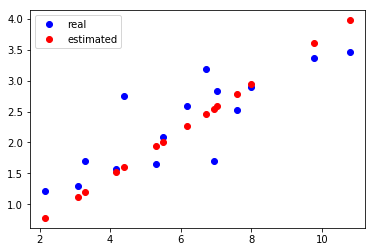

In [20]:
plt.plot(x_train, y_train, 'bo', label = "real")
plt.plot(x_train, y_.data.numpy(), 'ro', label = 'estimated')
plt.legend()

In [21]:
w = Variable(torch.randn(1), requires_grad = True)

In [22]:
b = Variable(torch.zeros(1), requires_grad = True)

In [23]:
for i in range(20):
    y_ = linear_model(x)
    loss = get_loss(y_, y)
    
    loss.backward()
    
    w.data = w.data - w.grad.data*1e-2
    b.data = b.data - b.grad.data*1e-2
    
    w.grad.zero_()
    b.grad.zero_()
    
    print('epoch: {}, loss: {}'.format(i,   loss.data))

epoch: 0, loss: 49.454833984375
epoch: 1, loss: 1.1845604181289673
epoch: 2, loss: 0.2907055616378784
epoch: 3, loss: 0.27363482117652893
epoch: 4, loss: 0.2727932631969452
epoch: 5, loss: 0.2722547650337219
epoch: 6, loss: 0.27172455191612244
epoch: 7, loss: 0.2711971402168274
epoch: 8, loss: 0.2706725299358368
epoch: 9, loss: 0.27015048265457153
epoch: 10, loss: 0.26963111758232117
epoch: 11, loss: 0.26911452412605286
epoch: 12, loss: 0.2686004936695099
epoch: 13, loss: 0.2680891454219818
epoch: 14, loss: 0.26758038997650146
epoch: 15, loss: 0.26707425713539124
epoch: 16, loss: 0.2665707468986511
epoch: 17, loss: 0.26606976985931396
epoch: 18, loss: 0.26557138562202454
epoch: 19, loss: 0.26507553458213806


In [24]:
w = Variable(torch.randn(1), requires_grad = True)

In [25]:
b = Variable(torch.zeros(1), requires_grad = True)

In [26]:
for i in range(30):
    y_ = linear_model(x)
    loss = get_loss(y_, y)
    
    loss.backward()
    
    w.data = w.data - w.grad.data*1e-2
    b.data = b.data - b.grad.data*1e-2
    
    w.grad.zero_()
    b.grad.zero_()
    
    print('epoch: {}, loss: {}'.format(i,   loss.data))

epoch: 0, loss: 74.78597259521484
epoch: 1, loss: 1.5900688171386719
epoch: 2, loss: 0.2352474331855774
epoch: 3, loss: 0.20996879041194916
epoch: 4, loss: 0.20929665863513947
epoch: 5, loss: 0.20908097922801971
epoch: 6, loss: 0.20887479186058044
epoch: 7, loss: 0.2086697667837143
epoch: 8, loss: 0.20846585929393768
epoch: 9, loss: 0.20826295018196106
epoch: 10, loss: 0.2080611139535904
epoch: 11, loss: 0.2078603059053421
epoch: 12, loss: 0.207660511136055
epoch: 13, loss: 0.20746175944805145
epoch: 14, loss: 0.2072639912366867
epoch: 15, loss: 0.20706728100776672
epoch: 16, loss: 0.20687158405780792
epoch: 17, loss: 0.2066768854856491
epoch: 18, loss: 0.20648318529129028
epoch: 19, loss: 0.20629046857357025
epoch: 20, loss: 0.20609872043132782
epoch: 21, loss: 0.20590795576572418
epoch: 22, loss: 0.20571821928024292
epoch: 23, loss: 0.20552940666675568
epoch: 24, loss: 0.20534160733222961
epoch: 25, loss: 0.20515471696853638
epoch: 26, loss: 0.20496882498264313
epoch: 27, loss: 0.204

In [28]:
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


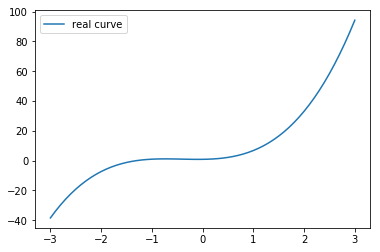

In [32]:
x_sample =  np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [30]:
x.sample

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

In [34]:
x = np.stack([x_sample ** i for i in range(1, 4)], axis=1)

In [35]:
x

array([[-3.00000000e+00,  9.00000000e+00, -2.70000000e+01],
       [-2.90000000e+00,  8.41000000e+00, -2.43890000e+01],
       [-2.80000000e+00,  7.84000000e+00, -2.19520000e+01],
       [-2.70000000e+00,  7.29000000e+00, -1.96830000e+01],
       [-2.60000000e+00,  6.76000000e+00, -1.75760000e+01],
       [-2.50000000e+00,  6.25000000e+00, -1.56250000e+01],
       [-2.40000000e+00,  5.76000000e+00, -1.38240000e+01],
       [-2.30000000e+00,  5.29000000e+00, -1.21670000e+01],
       [-2.20000000e+00,  4.84000000e+00, -1.06480000e+01],
       [-2.10000000e+00,  4.41000000e+00, -9.26100000e+00],
       [-2.00000000e+00,  4.00000000e+00, -8.00000000e+00],
       [-1.90000000e+00,  3.61000000e+00, -6.85900000e+00],
       [-1.80000000e+00,  3.24000000e+00, -5.83200000e+00],
       [-1.70000000e+00,  2.89000000e+00, -4.91300000e+00],
       [-1.60000000e+00,  2.56000000e+00, -4.09600000e+00],
       [-1.50000000e+00,  2.25000000e+00, -3.37500000e+00],
       [-1.40000000e+00,  1.96000000e+00

In [36]:
x_train = torch.from_numpy(x).float()

In [37]:
y_train = torch.from_numpy(y_sample).float().unsqueeze(1)

In [38]:
y_train

tensor([[-3.8400e+01],
        [-3.3854e+01],
        [-2.9665e+01],
        [-2.5819e+01],
        [-2.2302e+01],
        [-1.9100e+01],
        [-1.6198e+01],
        [-1.3581e+01],
        [-1.1235e+01],
        [-9.1464e+00],
        [-7.3000e+00],
        [-5.6816e+00],
        [-4.2768e+00],
        [-3.0712e+00],
        [-2.0504e+00],
        [-1.2000e+00],
        [-5.0560e-01],
        [ 4.7200e-02],
        [ 4.7280e-01],
        [ 7.8560e-01],
        [ 1.0000e+00],
        [ 1.1304e+00],
        [ 1.1912e+00],
        [ 1.1968e+00],
        [ 1.1616e+00],
        [ 1.1000e+00],
        [ 1.0264e+00],
        [ 9.5520e-01],
        [ 9.0080e-01],
        [ 8.7760e-01],
        [ 9.0000e-01],
        [ 9.8240e-01],
        [ 1.1392e+00],
        [ 1.3848e+00],
        [ 1.7336e+00],
        [ 2.2000e+00],
        [ 2.7984e+00],
        [ 3.5432e+00],
        [ 4.4488e+00],
        [ 5.5296e+00],
        [ 6.8000e+00],
        [ 8.2744e+00],
        [ 9.9672e+00],
        [ 1

In [39]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

In [40]:
def multi_linear(x):
    return torch.mm(x, w) + b

In [41]:
y_predict = multi_linear(x_train)

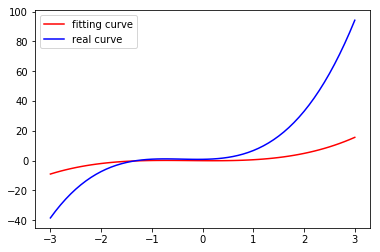

In [43]:
plt.plot(x_train.data.numpy()[:, 0], y_predict.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [44]:
loss = get_loss(y_predict, y_train)

In [45]:
print(loss)

tensor(607.7189, grad_fn=<MeanBackward1>)


In [46]:
loss.backward()

In [47]:
print(w.grad)

tensor([[ -70.8839],
        [ -96.5067],
        [-465.7435]])


In [48]:
print(b.grad)

tensor([-18.1009])


In [49]:
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

In [51]:
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data))

epoch 20, Loss: 7.50133
epoch 40, Loss: 1.86143
epoch 60, Loss: 0.54119
epoch 80, Loss: 0.22921
epoch 100, Loss: 0.15268


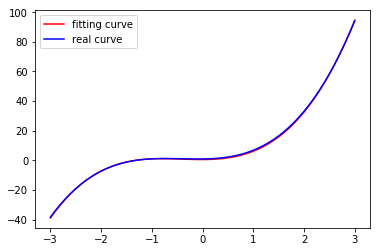

In [52]:
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()